In [1]:
from prepare_data import prepare_data


data = prepare_data(5, 20, 50, 0.014)

data = data.iloc[4500:] # Remove some data
data

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,...,Diff,Short_day_change,Mid_day_change,Long_day_change,t+1,t+2,t+4,t+5,t+3,Target
867,2021-05-10,99.22,99.26,98.84,99.34,98.10,99.34,98.825,2918512.0,2.884048e+08,...,0.92,0.188,0.1200,0.1724,97.56,96.76,98.76,98.90,99.70,0
866,2021-05-11,97.50,97.56,98.84,99.02,97.52,97.56,98.118,5113260.0,5.017266e+08,...,-1.78,0.172,0.0480,0.1708,96.76,99.70,98.90,97.64,98.76,1
865,2021-05-12,96.14,96.18,96.90,97.30,95.94,96.76,96.492,3670967.0,3.542064e+08,...,-0.80,-0.324,0.0330,0.1252,99.70,98.76,97.64,98.26,98.90,1
864,2021-05-14,99.78,99.82,98.10,100.20,97.34,99.70,98.940,6147501.0,6.082310e+08,...,2.94,0.228,0.2110,0.1768,98.76,98.90,98.26,98.62,97.64,0
863,2021-05-17,98.94,98.98,99.64,99.70,97.88,98.76,98.538,4034215.0,3.974850e+08,...,-0.94,0.068,0.0860,0.1340,98.90,97.64,98.62,98.20,98.26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2024-09-30,104.15,104.20,104.75,105.65,104.00,104.25,104.472,4093714.0,4.276752e+08,...,-0.50,-0.320,-0.1100,-0.0660,103.30,103.85,102.00,102.45,101.20,0
8,2024-10-01,103.30,103.40,104.15,105.10,102.85,103.30,103.829,4874748.0,5.061708e+08,...,-0.95,-0.630,-0.0925,-0.0740,103.85,101.20,102.45,102.05,102.00,0
7,2024-10-02,103.80,103.85,103.25,103.90,102.50,103.85,103.600,3795117.0,3.931211e+08,...,0.55,-0.510,-0.0725,-0.0490,101.20,102.00,102.05,101.95,102.45,0
6,2024-10-03,101.15,101.20,103.65,103.65,100.90,101.20,101.707,5988553.0,6.090106e+08,...,-2.65,-1.070,-0.2475,-0.1100,102.00,102.45,101.95,101.70,102.05,0


## Visualize

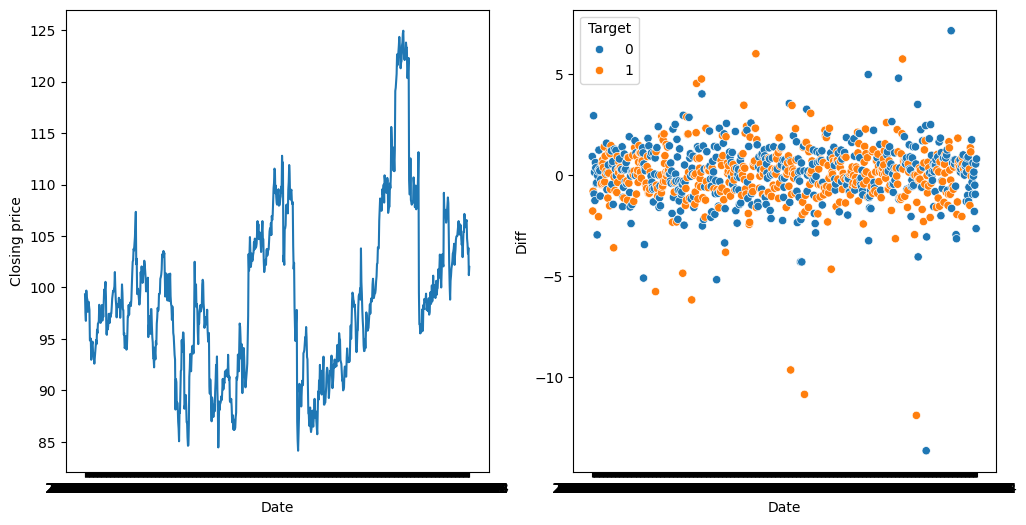

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  

sns.lineplot(data=data, x="Date", y="Closing price", ax=ax1)
sns.scatterplot(data=data, x="Date", y="Diff", hue="Target", ax=ax2)

plt.show()

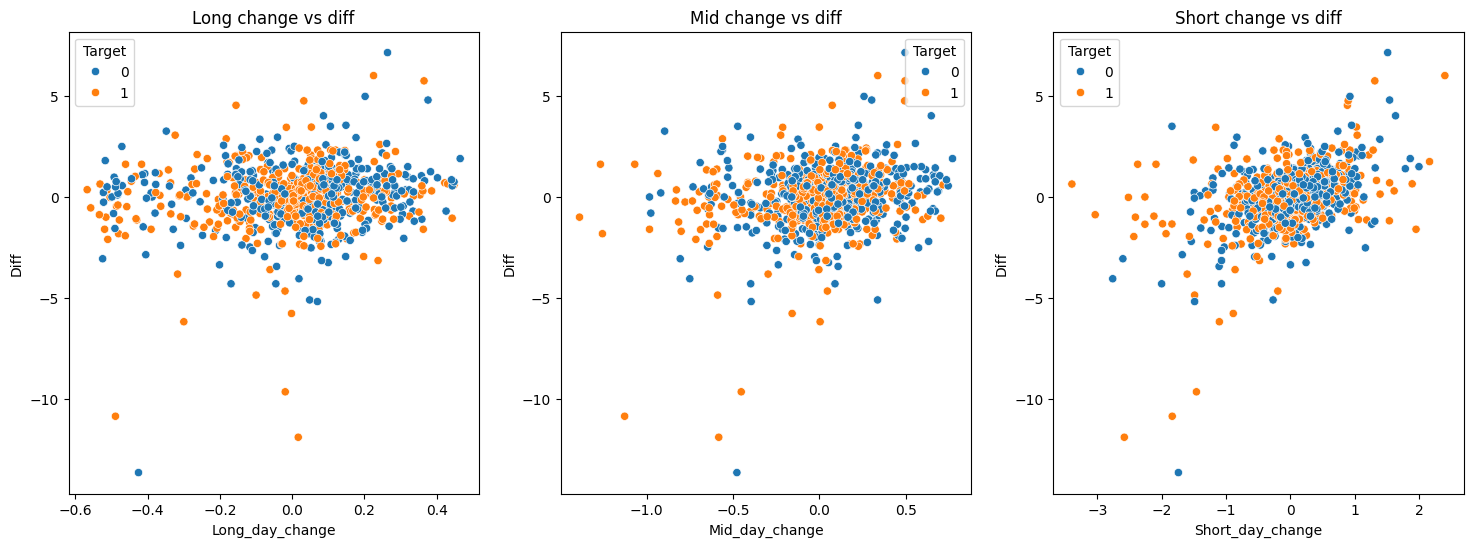

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6)) 

sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="Target", ax=ax1)
ax1.set_title("Long change vs diff")

sns.scatterplot(data=data, x="Mid_day_change", y="Diff", hue="Target", ax=ax2)
ax2.set_title("Mid change vs diff")

sns.scatterplot(data=data, x="Short_day_change", y="Diff", hue="Target", ax=ax3)
ax3.set_title("Short change vs diff")

plt.show()

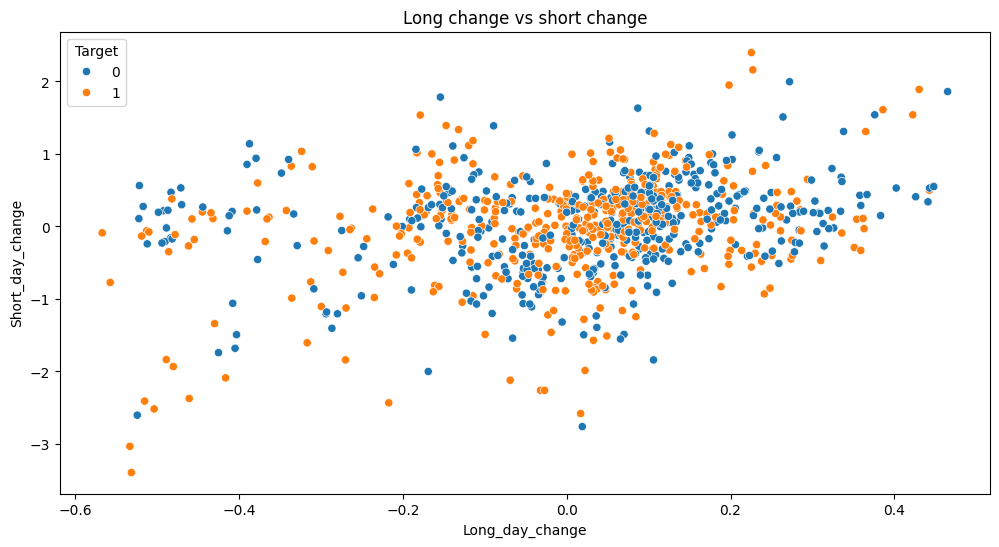

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6)) 

sns.scatterplot(data=data, x="Long_day_change", y="Short_day_change", hue="Target", ax=ax1)
ax1.set_title("Long change vs short change")

plt.show()

<Axes: xlabel='Date', ylabel='Long_day_change'>

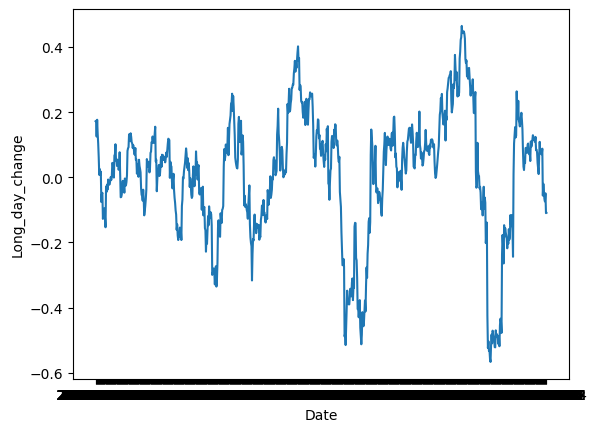

In [12]:
sns.lineplot(data=data, x="Date", y="Long_day_change")
plt.show()

## Scale data


In [6]:
from sklearn.preprocessing import StandardScaler

X = data[["Diff", "Short_day_change", "Mid_day_change", "Long_day_change"]].values

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X=X)

X_scaled

array([[ 0.58133726,  0.26598039,  0.34807726,  0.84962203],
       [-1.13248893,  0.24264949,  0.12058875,  0.84127396],
       [-0.5104335 , -0.48060847,  0.07319531,  0.60335387],
       ...,
       [ 0.34647959, -0.75183021, -0.26013854, -0.30554263],
       [-1.68472181, -1.56841178, -0.81306201, -0.62381293],
       [ 0.5051672 , -0.81015746, -0.52870137, -0.61859539]])

## Clustering

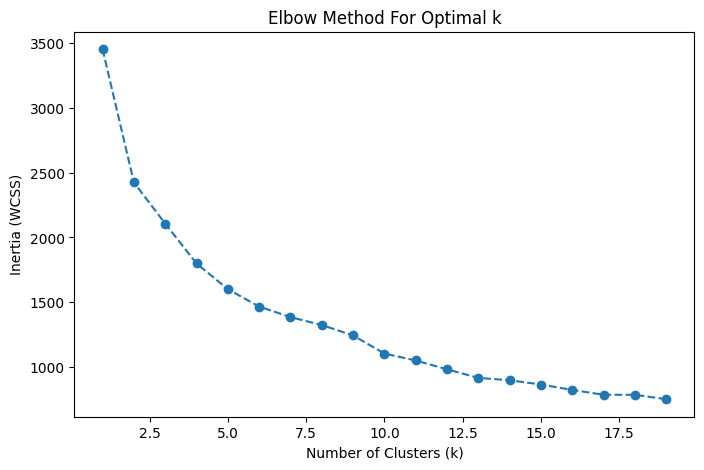

In [7]:
from sklearn.cluster import KMeans
import pandas as pd

# kmeans = KMeans(n_clusters=4)

# pred = kmeans.fit_predict(X=X_scaled)
# data["kmeans_label"] = pred

# List to store the inertia values for each k
inertia_values = []

# Range of k values to try (e.g., from 1 to 10)
k_range = range(1, 20)

# Perform KMeans for each k and store the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show()

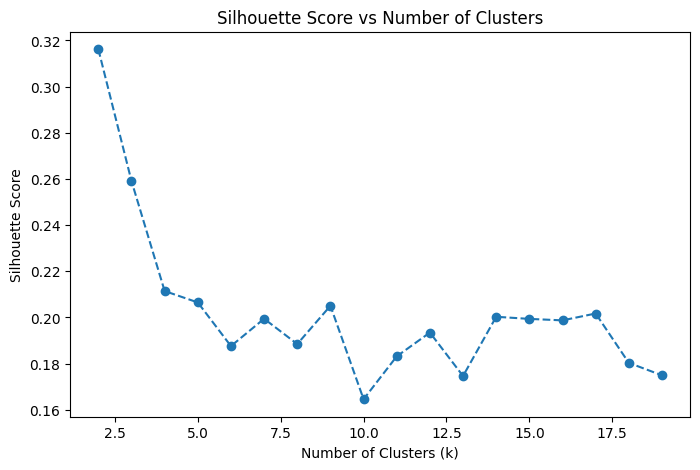

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Loop through the range of k values and compute silhouette score
for k in k_range[1:]:  # Start from 2 because silhouette score isn't defined for k=1
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range[1:], silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

C:\Users\Erik\AppData\Local\Temp\ipykernel_16548\1967245916.py:11: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="kmeans_label", ax=ax1, palette=sns.color_palette("tab10", 8))
C:\Users\Erik\AppData\Local\Temp\ipykernel_16548\1967245916.py:21: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data=data, x="Short_day_change", y="Diff", hue="kmeans_label", ax=ax3, palette=sns.color_palette("tab10", 8))
C:\Users\Erik\AppData\Local\Temp\ipykernel_16548\1967245916.py:24: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(data=data, x="Mid_day_change", y="Diff", hue="kmeans_label", ax=ax4, palette=sns.color_palette("tab10", 8))


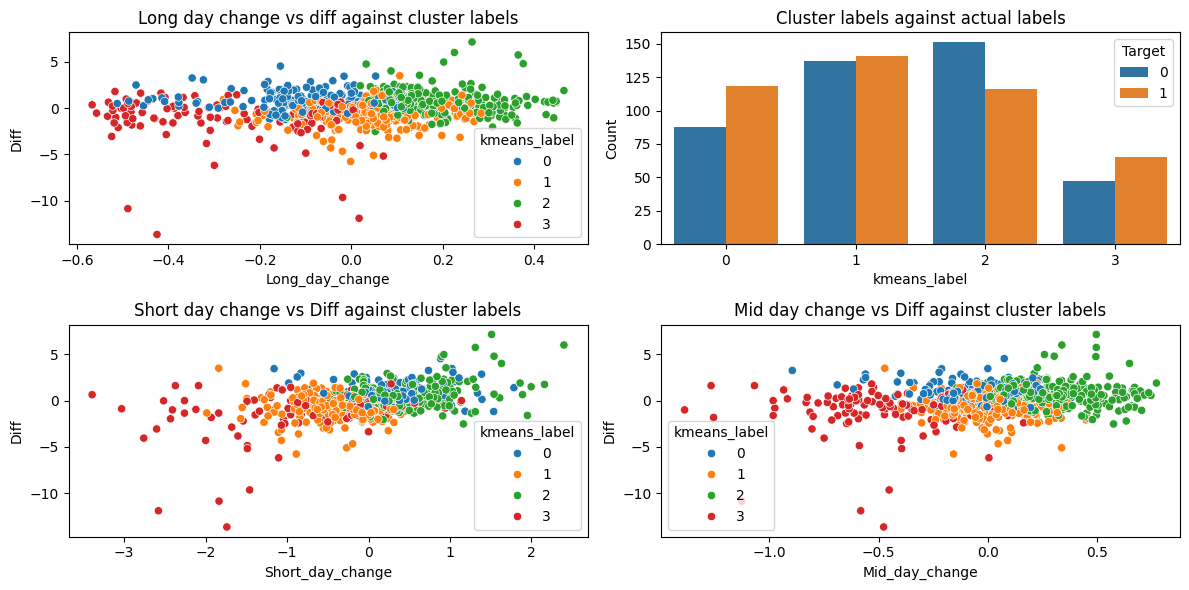

In [9]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=4)

pred = kmeans.fit_predict(X=X_scaled)
data["kmeans_label"] = pred

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="kmeans_label", ax=ax1, palette=sns.color_palette("tab10", 8))
ax1.set_title("Long day change vs diff against cluster labels")

cluster_vs_actual = pd.crosstab(data['kmeans_label'], data['Target'])
cluster_vs_actual = cluster_vs_actual.reset_index()
cluster_vs_actual_melted = cluster_vs_actual.melt(id_vars='kmeans_label', var_name='Target', value_name='Count')

sns.barplot(x='kmeans_label', y='Count', hue='Target', data=cluster_vs_actual_melted, ax=ax2)
ax2.set_title("Cluster labels against actual labels")

sns.scatterplot(data=data, x="Short_day_change", y="Diff", hue="kmeans_label", ax=ax3, palette=sns.color_palette("tab10", 8))
ax3.set_title("Short day change vs Diff against cluster labels")

sns.scatterplot(data=data, x="Mid_day_change", y="Diff", hue="kmeans_label", ax=ax4, palette=sns.color_palette("tab10", 8))
ax4.set_title("Mid day change vs Diff against cluster labels")

plt.subplots_adjust(hspace=0.4)  # Adjust hspace to increase space between rows
plt.tight_layout()  # Automatically adjusts the spacing to avoid overlap

plt.show()

In [10]:
# Filter the rows where 'kmeans_label' equals 2
cluster2 = data[data["kmeans_label"] == 2]

# Get the value counts of different columns (e.g., 'Actual Label' or another column)
cluster2_counts = cluster2["Target"].value_counts()

print(cluster2_counts)


Target
0    151
1    116
Name: count, dtype: int64


[-1  0  1  2  3  4]


C:\Users\Erik\AppData\Local\Temp\ipykernel_16548\3746376779.py:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="dbscan_label", ax=ax1, palette=sns.color_palette("tab10", 8))


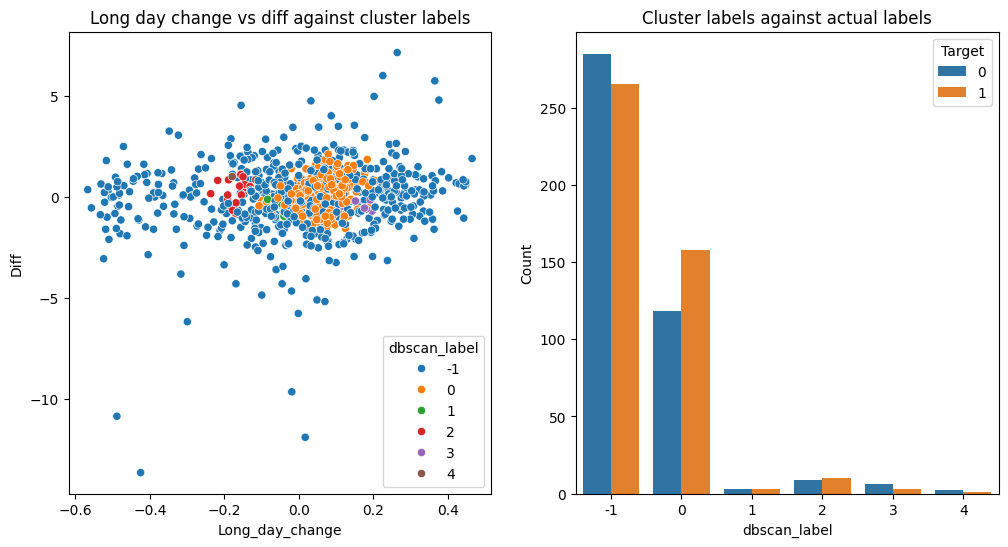

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.4, min_samples=6)

pred_dbscan = dbscan.fit_predict(X_scaled)
data["dbscan_label"] = pred_dbscan

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 

sns.scatterplot(data=data, x="Long_day_change", y="Diff", hue="dbscan_label", ax=ax1, palette=sns.color_palette("tab10", 8))
ax1.set_title("Long day change vs diff against cluster labels")

cluster_vs_actual = pd.crosstab(data['dbscan_label'], data['Target'])
cluster_vs_actual = cluster_vs_actual.reset_index()
cluster_vs_actual_melted = cluster_vs_actual.melt(id_vars='dbscan_label', var_name='Target', value_name='Count')

sns.barplot(x='dbscan_label', y='Count', hue='Target', data=cluster_vs_actual_melted, ax=ax2)
ax2.set_title("Cluster labels against actual labels")

print(np.unique(pred_dbscan))
plt.show()